# Hamiltonian

In [56]:
#Laod current hamiltonian file
using LinearAlgebra, Plots
include("../src/hamiltonian.jl")

add_onsite_disorder (generic function with 1 method)

In [67]:
L   = 200 # number of sites
σ   = 0.0   # disorder
t   = 0.5 # hopping
E   = 2.   # on-site energy
ham = quasiperiodic_hamiltonian(L, Float64(pi), t, σ, E, qp_type="hopping");


In [58]:
#Spectrum
evals_list, evecs_list = eigen(ham);

evals_list[1:100]
#typeof(evecs_list)
#evecs_list
#size(evecs_list)

100-element Vector{Float64}:
 0.9999999999999996
 1.0000000000000007
 1.0078852986855222
 1.0078852986855231
 1.0078852986855238
 1.0078852986855238
 1.031416838871368
 1.0314168388713685
 1.0314168388713696
 1.0314168388713696
 ⋮
 2.968583161128631
 2.9685831611286315
 2.9685831611286315
 2.9921147013144758
 2.9921147013144775
 2.992114701314478
 2.9921147013144784
 3.0
 3.0000000000000004

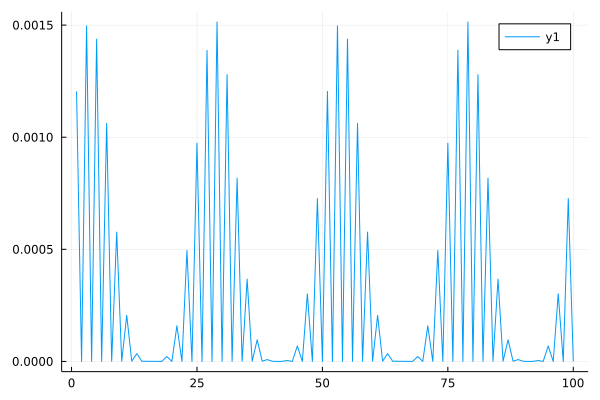

In [59]:
# Look at eigenvector
plot_inst = plot(1:L, abs.(evecs_list[:,8]).^4 )

#plot!(1:L, abs.(evecs_list[:,2]) ) 

plot_inst

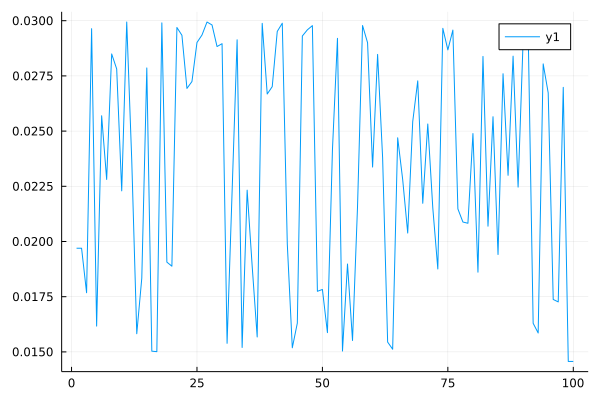

In [60]:
# plot ipr for some eigenstates
include("/Users/mrampp/Github/PKS_Julia_Hackathon/src/observables.jl")
ipr = inverse_participation_ratio(evecs_list)
#ipr
plot_ipr = plot(1:L, ipr )

plot_ipr

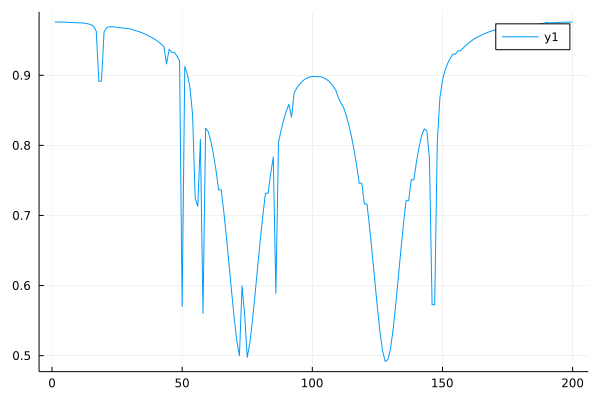

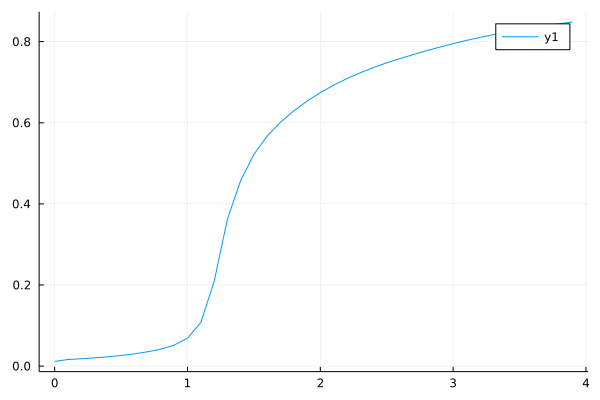

In [70]:
# compare different disorder strengths
plot_compare = plot()
width_range = [0.0+0.1*(i-1) for i=1:40]
average = zeros(length(width_range))
for (i, width) in enumerate(width_range)
    ham = quasiperiodic_hamiltonian(L, 1/Float64(pi), t, width, E, qp_type="site");
    evecs_list = eigvecs(ham)
    ipr2 = inverse_participation_ratio(evecs_list)
    average[i] = sum(ipr2)/length(ipr2)
    #plot_compare = plot!(1:L, ipr2 )
    if i==length(width_range)
        plot_compare = plot!(1:L, ipr2 )
    end
end

plot_compare_average = plot(width_range,average)

display(plot_compare)
display(plot_compare_average)
    

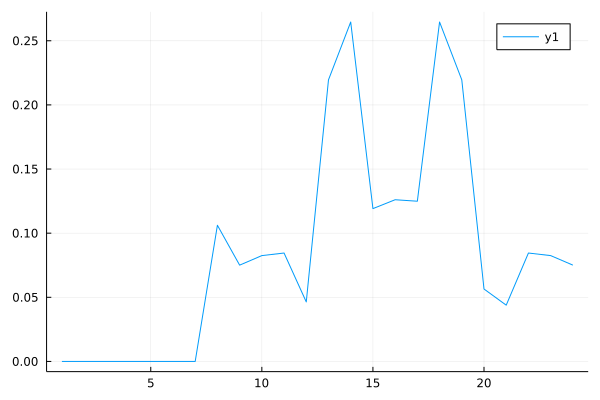

In [45]:
# energy resolved ipr
bins = LinRange(-0.6,3.3,25)
en_resolved_ipr = binned_average(evals_list, ipr, bins )
#en_resolved_ipr
plot_en_resolved_ipr = plot(1:length(bins)-1, en_resolved_ipr)

display(plot_en_resolved_ipr)

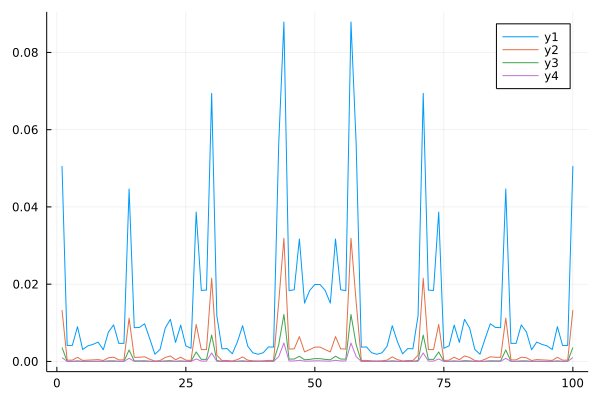

In [46]:
# plot further wavefunction moments
mom1 = wavefunction_moment(3,evecs_list)
plot_moments = plot(1:L, mom1 )
for q in 4:6
    mom_new = wavefunction_moment(q,evecs_list)
    plot!(1:L,mom_new)
end

plot_moments